# Test Aperture Photometry

Tests that WrappedFits is able to load a local directory of calints files, and that PhotometryData is then able to extract the raw flux from it.

In [2]:
import sys
import os
directory = os.path.abspath(os.path.dirname(os.getcwd()) + "/src")
sys.path.append(directory)

from erebus.photometry_data import PhotometryData
from erebus.wrapped_fits import WrappedFits
from erebus.utility import fits_file_utils as f_utils
import matplotlib.pyplot as plt

In [3]:
folder = "./mast_lhs1478b"
visits = f_utils.get_fits_files_visits_in_folder(folder)

## Load directly from calints via util method

In [4]:
frames, time = f_utils.load_all_calints_for_visit(folder, visits[0])

Loading data from calints in ./mast_lhs1478b
Loading 5 segments
INT_TIMES format: (1, 60329.22548765673, 60329.225555258396, 60329.22562286005, 60329.228486335065, 60329.228553933965, 60329.228621532864)
Loaded segment 1
INT_TIMES format: (235, 60329.25793645459, 60329.258004056246, 60329.25807165791, 60329.26093380684, 60329.261001405735, 60329.261069004635)
Loaded segment 2
INT_TIMES format: (469, 60329.29038525245, 60329.29045285411, 60329.290520455776, 60329.2933812779, 60329.2934488768, 60329.2935164757)
Loaded segment 3
INT_TIMES format: (703, 60329.32283405031, 60329.322901651976, 60329.32296925363, 60329.32582874826, 60329.32589634715, 60329.325963946045)
Loaded segment 4
INT_TIMES format: (937, 60329.35528284817, 60329.35535044983, 60329.35541805149, 60329.35827621789, 60329.35834381678, 60329.35841141568)
Loaded segment 5
Sorting data


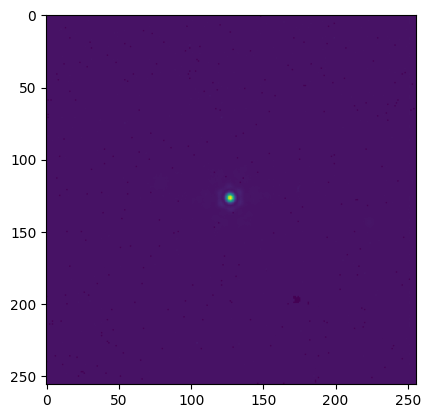

In [5]:
plt.imshow(frames[0])
plt.show()

## Load using wrapped fits and extract photometry

In [ ]:
fits = WrappedFits(folder, visits[0], force_clear_cache=True)
photometry = PhotometryData(fits, 5, (12,20), force_clear_cache=True)

Loading data from calints in ./mast_lhs1478b
Loading 5 segments
INT_TIMES format: (1, 60329.22548765673, 60329.225555258396, 60329.22562286005, 60329.228486335065, 60329.228553933965, 60329.228621532864)
Loaded segment 1
INT_TIMES format: (235, 60329.25793645459, 60329.258004056246, 60329.25807165791, 60329.26093380684, 60329.261001405735, 60329.261069004635)
Loaded segment 2
INT_TIMES format: (469, 60329.29038525245, 60329.29045285411, 60329.290520455776, 60329.2933812779, 60329.2934488768, 60329.2935164757)
Loaded segment 3
INT_TIMES format: (703, 60329.32283405031, 60329.322901651976, 60329.32296925363, 60329.32582874826, 60329.32589634715, 60329.325963946045)
Loaded segment 4
INT_TIMES format: (937, 60329.35528284817, 60329.35535044983, 60329.35541805149, 60329.35827621789, 60329.35834381678, 60329.35841141568)
Loaded segment 5
Sorting data
Found star at: 127, 127
Cleaning 964 frames


In [ ]:
plt.plot(photometry.time[20:-40], photometry.raw_flux[20:-40], linestyle='', marker='.')
plt.show()

## Load from cache

In [ ]:
fits = WrappedFits(folder, visits[0], force_clear_cache=False)
photometry = PhotometryData(fits, 5, (12,20), force_clear_cache=False)
plt.plot(photometry.time[20:-40], photometry.raw_flux[20:-40], linestyle='', marker='.')
plt.show()